In [1]:
import json

In [2]:
# Cargar el archivo JSON
with open("JuegosOlimpicosDATASETS.json", "r", encoding="utf-8") as f:
    data = json.load(f)  # Asegúrate de que el JSON es un array

In [3]:
# Seleccionar solo los primeros 250,000 registros
data_filtrada = data[:250000]

In [4]:

# Guardar el nuevo JSON filtrado
with open("JuegosOlimpicosDATASETS_Recortado.json", "w", encoding="utf-8") as f:
    json.dump(data_filtrada, f, ensure_ascii=False, indent=4)


In [5]:
print("Archivo filtrado guardado como 'JuegosOlimpicosDATASETS_Recortado.json'")

Archivo filtrado guardado como 'JuegosOlimpicosDATASETS_Recortado.json'


In [1]:
import pymongo

In [2]:
import sqlite3
import pandas as pd

In [3]:
# Conectar a MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["mibase"]
collection = db["Juegos_Olimpicos"]

In [7]:
# Extraer los datos desde MongoDB
data = list(collection.find({}, {"_id": 0}))  # Para excluir id
df = pd.DataFrame(data)  # Convertir a DataFrame


In [21]:
#conectar a sqlite

SQLITE_DB = "EventoDeportivo.db"
sqlite_conn = sqlite3.connect(SQLITE_DB)
cursor = sqlite_conn.cursor()

In [22]:
# Crear tabla en SQLite (ajustar según la estructura del JSON)
columns = ", ".join([f"{col} TEXT" for col in df.columns])
cursor.execute(f"CREATE TABLE IF NOT EXISTS JuegosOlimpicos ({columns})")

In [23]:
# Insertar datos en SQLite
df.to_sql("JuegosOlimpicos", sqlite_conn, if_exists="replace", index=False)

250000

In [27]:
#Convertir de json a csv
df.to_csv("JuegosOlimpicos.csv", index=False)

In [47]:
con = sqlite3.connect("EventoDeportivo.db")

In [48]:
df1 = pd.read_sql_query("SELECT * FROM JuegosOlimpicos",con)

In [89]:
#limpieza de datos
# Eliminar filas duplicadas
df1 = df1.drop_duplicates()

# Verificar si se eliminaron duplicados
print(df1.shape)  # Verifica el número de filas y columnas después de eliminar

(248750, 16)


In [90]:
# Mostrar las primeras filas para verificar la estructura
print(df1.head())
print(df1.columns)  # Verificar el nombre de las columnas

   ID                      Name Sex Age Height Weight            Team  NOC  \
0   1                 A Dijiang   M  24    180     80           China  CHN   
1   2                  A Lamusi   M  23    170     60           China  CHN   
2   3       Gunnar Nielsen Aaby   M  24     NA     NA         Denmark  DEN   
3   4      Edgar Lindenau Aabye   M  34     NA     NA  Denmark/Sweden  DEN   
4   5  Christine Jacoba Aaftink   F  21    185     82     Netherlands  NED   

         Games  Year  Season       City          Sport  \
0  1992 Summer  1992  Summer  Barcelona     Basketball   
1  2012 Summer  2012  Summer     London           Judo   
2  1920 Summer  1920  Summer  Antwerpen       Football   
3  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  sentimiento  
0       Basketball Men's Basketball    na         -1.0  
1      Judo Men's Extra-Lightweight    na         -1.0  
2          

In [91]:
# Función para asignar sentimiento según la medalla
def sentimiento_por_medalla(medalla):
    if isinstance(medalla, str):
        medalla = medalla.lower()  # Convertir a minúsculas para evitar problemas de formato
        if "gold" in medalla:
            return 1.0  # Oro
        elif "silver" in medalla:
            return 0.5  # Plata
        elif "bronze" in medalla:
            return 0.0  # Bronce
        else:
            return -1.0  # Sin medalla
    return -1.0  # Negativo si no es un valor válido

# Aplicar la función a la columna 'Medal' para crear la columna 'sentimiento'
df1["sentimiento"] = df1["Medal"].apply(sentimiento_por_medalla)

# Verificar los primeros registros después de aplicar la función
print(df1[['Medal', 'sentimiento']].head(50))

     Medal  sentimiento
0       na         -1.0
1       na         -1.0
2       na         -1.0
3     gold          1.0
4       na         -1.0
5       na         -1.0
6       na         -1.0
7       na         -1.0
8       na         -1.0
9       na         -1.0
10      na         -1.0
11      na         -1.0
12      na         -1.0
13      na         -1.0
14      na         -1.0
15      na         -1.0
16      na         -1.0
17      na         -1.0
18      na         -1.0
19      na         -1.0
20      na         -1.0
21      na         -1.0
22      na         -1.0
23      na         -1.0
24      na         -1.0
25      na         -1.0
26      na         -1.0
27      na         -1.0
28      na         -1.0
29      na         -1.0
30      na         -1.0
31      na         -1.0
32      na         -1.0
33      na         -1.0
34      na         -1.0
35      na         -1.0
36      na         -1.0
37  bronze          0.0
38  bronze          0.0
39      na         -1.0
40  bronze      

In [92]:
# Verificar los valores únicos en la columna 'sentimiento'
print("Valores únicos en 'sentimiento':")
print(df1["sentimiento"].unique())

Valores únicos en 'sentimiento':
[-1.   1.   0.   0.5]


In [93]:
# Verificar el conteo de cada tipo de sentimiento
sentimientos_count = df1["sentimiento"].value_counts()
print("Conteo de Sentimientos:")
print(sentimientos_count)

Conteo de Sentimientos:
sentimiento
-1.0    212337
 1.0     12207
 0.0     12195
 0.5     12011
Name: count, dtype: int64


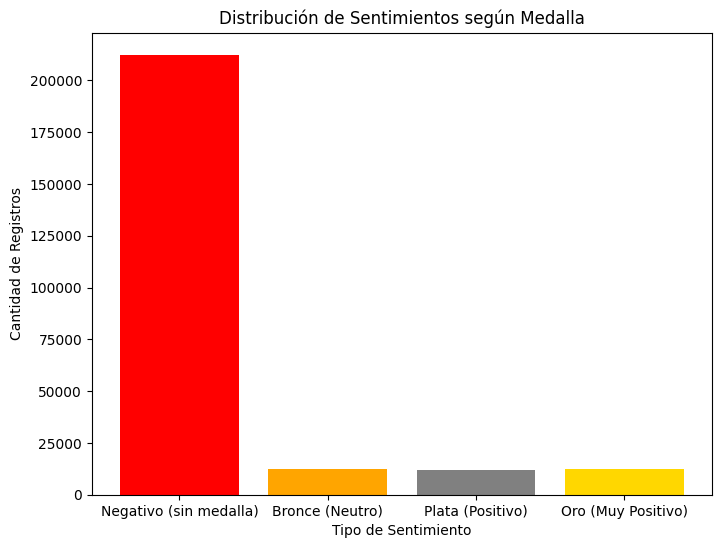

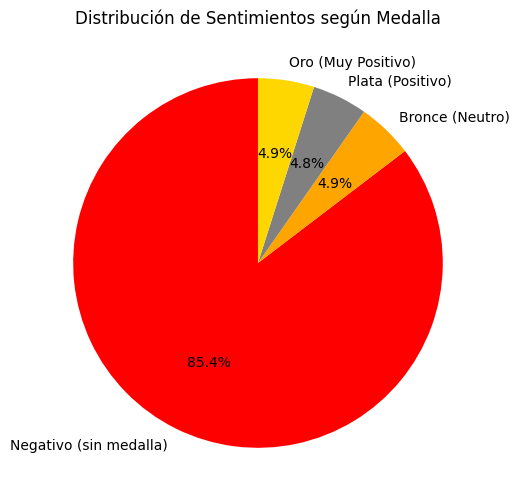

In [94]:
import matplotlib.pyplot as plt

# Asegurarnos de que las categorías estén correctamente contadas
sentimientos_labels = ['Negativo (sin medalla)', 'Bronce (Neutro)', 'Plata (Positivo)', 'Oro (Muy Positivo)']
sentimientos_values = [
    sentimientos_count.get(-1.0, 0),  # Negativo (sin medalla)
    sentimientos_count.get(0.0, 0),   # Bronce
    sentimientos_count.get(0.5, 0),   # Plata
    sentimientos_count.get(1.0, 0)    # Oro
]

# 1. Crear gráfico de barras
plt.figure(figsize=(8,6))
plt.bar(sentimientos_labels, sentimientos_values, color=['red', 'orange', 'gray', 'gold'])

# Añadir título y etiquetas
plt.title('Distribución de Sentimientos según Medalla')
plt.xlabel('Tipo de Sentimiento')
plt.ylabel('Cantidad de Registros')

# Mostrar gráfico de barras
plt.show()

# 2. Crear gráfico de pie
plt.figure(figsize=(8,6))
plt.pie(sentimientos_values, labels=sentimientos_labels, autopct='%1.1f%%', startangle=90, colors=['red', 'orange', 'gray', 'gold'])

# Añadir título
plt.title('Distribución de Sentimientos según Medalla')

# Mostrar gráfico de pie
plt.show()

In [95]:
# Guardar el dataset con la nueva columna de sentimientos
df1.to_csv("JuegosOlimpicos_sentimientos.csv", index=False)